# Opioid Overdoses in connecticut from 2012 to June 2017

### By Driss Guessous Last Updated (2017-10-26)

The Goal of this project was to explore a dataset from the DATA.Gov site entitle 'Accidental Drug Related Deaths 2012- June 2017' which can be found at [Data](https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015)

The only other external source for data was a CT government website containg a list of cities by county which can be found [here](http://www.ct.gov/ecd/cwp/view.asp?a=1106&q=250994)

A large amount of missing data regarding the County of Death and the County or Residence were missing. I created a few functions to create new columns using the death location data, which had no missing data, and the residence city data. I used value_counts function to determine which cities had multiple hits that were not in the list of cities then I manually looked them up to determine which county they were in.

## Summary of Results:

### Clustering Analysis:
* The clustering did not show clear groups with particular features.  More work refining the Models paramaters could be done discern possible clusterings.  Alternatively there may not be distinct clusters based upon the features of this dataset

SARIMAX(deaths_per_year.Value, trend='n', order=(1,1,2), seasonal_order=(1,1,1,12))
### Time Series Analyis:
* After refining a SARIMA Model of with ARIMA params of (1,1,2) and a seasonal order coresponding to 12 Months to account for any seasonal variability (i.e. The Hot Summer or Colder Winters can have an effect on Opiod use and therefore OverDoses)
* Clear upward trend was scene in the monthly death counts and the model forecasted a continuation in this non stationary trend. Seen Below:
![Graph](death_forecast.png)


#### Mean Age  =  42

#### Gender = 27% Female, 73% Male
* Roughly a 50-50 split between Men and Women

#### Race= 79% White, 8% Black
* 80% of population is White
* 11% of population is Black

#### Death County = 29% Hartford, 16% Fairfield, 27% New Haven
* Fairfield has the highest population of 26% of population but only 16% of deaths
* Hartfield has 24% of population but accounts for 30% of deaths. 
* New Haven has 24& of population and 27% of death
* The other counties match the census data in # of Deaths and Percentage of Population

###  Census Data from the [Census Bureau](https://www.census.gov/quickfacts/CT) 











## Data Manipulation:

In [1]:
#importing relavant libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing CT opiod overdose deaths data
data = pd.read_csv('data/drug_deaths.csv')

In [3]:
# creating a list of the drug columns who are coded as Y or N
drugs_list = ['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine (not heroin)', 'Other', 'Any Opioid',]

In [4]:

def clean_drug_columns(entry):
# turning the Y into 1 and N into 0 so that it will work with machine learing algorithim 
    if pd.isnull(entry):
        return 0
    elif entry == 'Y':
        return 1

def clean_all_drugs(drugs):
# applying the Y to 1 N to 0 schema to all columns     
    for drug in drugs:
        data[drug] = data[drug].apply(clean_drug_columns)    
    
        

In [5]:
def fill_missing_drugs(drugs):
#creating function to run through all the drugs and fill the NAN values with 0     
    for drug in drugs:
        data[drug] = data[drug].fillna(0)
clean_all_drugs(drugs_list)
data.Other = data.Other.fillna(0)
fill_missing_drugs(drugs_list)        

In [6]:
#This list was created using http://www.ct.gov/ecd/cwp/view.asp?a=1106&q=250994 the CT gov website showing cities by county, used to clean up data
Fairfield = 'Bethel, Bridgeport, Brookfield, Danbury, Darien, Easton, Fairfield, Greenwich, Monroe, New Canaan, New Fairfield, Newtown, Norwalk,  Shelton, Sherman, Stamford, Stratford, Redding, Ridgefield, Trumbull, Weston, Westport, Wilton'
Hartford = 'Avon, Berlin, Bloomfield, Bristol, Burlington, Canton, East Granby, East, Hartford, , East Windsor, Enfield, Farmington, Glastonbury, Granby, Hartford, Hartland, Manchester, Marlborough, New Britain, Newington, Plainville, Rocky  Hill, Simsbury, Southington, South Windsor, Suffield, West Hartford, Wethersfield, Windsor, Windsor Locks, East Hartford, S Glastonbury'
Litchfield = 'Barkhamsted, Oakville, Winsted, Bethlehem, Bridgewater, Canaan, Colebrook, Cornwall, Goshen, Harwinton, Kent, Litchfield, Morris, New Hartford, New Milford, Norfolk, North Canaan, Plymouth, Roxbury, Salisbury, Sharon, Thomaston, Torrington, Warren, Washington, Watertown, Winchester, Woodbury'
Middlesex = 'Chester, Clinton, Cromwell, Deep River, Durham, East Haddam, East Hampton, Essex, Haddam, Killingworth, Middlefield, Middletown, Old Saybrook, Portland, Westbrook'
New_Haven = 'Ansonia, W Haven, E Haven, Beacon Falls, Bethany, Branford, Cheshire, Derby, East Haven, Guilford, Hamden, Madison, Meriden, Middlebury, Milford, Naugatuck, New Haven, North Branford, North Haven, Orange, Oxford, Prospect, Seymour, Southbury, Wallingford, Waterbury, West Haven, Wolcott, Woodbridge'
New_London = 'Bozrah, Oakdale, Mystic, Uncasville, Colchester, East Lyme, Franklin, Griswold, Groton, Lebanon, Ledyard, Lisbon, Lyme, Montville, New London, North Stonington, Norwich, Old Lyme, Preston, Salem, Sprague, Stonington, Voluntown, Waterford'
Tolland = 'Andover, Bolton, Columbia, Coventry, Ellington, Hebron, Mansfield, Somers, Stafford, Tolland, Union, Vernon, Willington'
Windham = 'Ashford, East Woodstock, Willimantic, Brooklyn, Canterbury, Chaplin, Eastford, Hampton, Killingly, Plainfield, Pomfret, Putnam, Scotland, Sterling, Thompson, Windham, Woodstock'

In [7]:
#creating dictionary between the cities and the county name
counties_list = {'Fairfield':Fairfield,'Windham':Windham,'Tolland':Tolland,
                 'New London':New_London,'New Haven':New_Haven,'Middlesex':Middlesex,
                 'Litchfield':Litchfield,'Hartford':Hartford}

In [8]:
def clean_counties_list(county):
# function used to turn the raw long strings in the imported data to individual city entries 
    county = [x.strip() for x in county.split(',')]
    return county
for key,value in counties_list.items():
        counties_list[key] = clean_counties_list(value)

In [9]:
#running through the Residence city column and using this to create new column where the counties are based off of this data 
for index, row in data.iterrows():
    if pd.notnull(row['Residence City']) and pd.notnull(row['Residence County']):
        data.loc[index,'New_Res_Counties'] = row['Residence County'].lower().title()
        
    elif pd.isnull(row['Residence City']) and pd.isnull(row['Residence County']):
        data.loc[index,'New_Res_Counties'] = 'Unknown'
        
    elif pd.notnull(row['Residence City']) and pd.isnull(row['Residence County']):
        for key,value in counties_list.items():
            if (row['Residence City'].lower().title()) in value:
                data.loc[index,'New_Res_Counties'] = key
    else:
        data.loc[index,'New_Res_Counties'] = row['Residence County'].lower().title()


In [10]:
def clean_up_res_counties(value):
#function to fix the new counties list with either the counties or unknown... 
#can clean up by adding more cities to the cities list
    if value not in list(counties_list.keys()):
        return 'Unknown'
    else:
        return value
        
data.New_Res_Counties = data.New_Res_Counties.apply(clean_up_res_counties)

In [11]:
#turning data string in to datetime values and creating a years column for other feature also a month column 
data.Date= pd.to_datetime(data.Date)
data['Years'] = data.Date.apply(lambda x: x.year)
data['Months'] = data.Date.apply(lambda x: x.month)

In [12]:
#filling in the nan values with unkonwns for most attributes dealing with death description
data.MannerofDeath = data.MannerofDeath.fillna('Unknown')
data.AmendedMannerofDeath = data.AmendedMannerofDeath.fillna('0')
data.DescriptionofInjury = data.DescriptionofInjury.fillna('None')
data.InjuryPlace = data.InjuryPlace.fillna('Unknown')
data.ImmediateCauseA = data.ImmediateCauseA.fillna('Unknown')
data.Location = data.Location.fillna('Unknown')

In [13]:
#Using the death location to create Death City column 
data['New_Death_City'] = data['DeathLoc']
data['New_Death_City']= data['New_Death_City'].apply(lambda x: x.split(',')[0].lower().title())
#Checked which city was null and used Lat Log to calculate which city it was in 
data.loc[data['Death City'].isnull(),['New_Death_City']] = 'Middletown'
data.loc[data.New_Death_City == '06340',['New_Death_City']]='Groton'

In [14]:
#Creating a new column called New_Death_Counties which contains a cleaned up version of death counties 
for index, row in data.iterrows():
    if pd.isnull(row['Death County']):
        for key,value in counties_list.items():
            if (row['New_Death_City'].lower().title()) in value:
                data.loc[index,'New_Death_Counties'] = key
    else:
        data.loc[index,'New_Death_Counties'] = row['Death County'].lower().title()            

In [15]:
#Updating the residence state information so that they are either CT or other 
for index, row in data.iterrows():
    if row.New_Res_Counties in counties_list.keys():
         data.loc[index,'New_Res_State'] = 'CT'
    else:
         data.loc[index,'New_Res_State'] = row['Residence State']
#filling all NAN values with unknown 
data['New_Res_State'].fillna('Unknown',inplace=True)        

In [16]:
#fillin in nan values with Race unknown, Sex: Male cause they are by far the mode of the data, 
#Age with mean, Date with unknown, and years with unknown and unknown residence city with unknown 
data.Race.fillna('Unknown',inplace=True)
data.Sex.fillna('Male',inplace=True)
data.Age.fillna(data.Age.mean(),inplace=True)
data.Years.fillna('Unknown',inplace=True)
data.loc[data.New_Death_Counties =='Usa',['New_Death_Counties']] = 'Hartford'

In [17]:
# Creating dummy vairables for the Sex column in the dataframe
def clean_gender(sex):
    if sex == 'Male':
        return 0
    else:
        return 1
data.Sex = data.Sex.apply(clean_gender)    

In [18]:
#There were ionly 3 values that didnt fit into Residence or Other so I decided to add them to Other
def clean_location(loc):
    if (loc == 'Unknown' or loc =='Hospice'  or loc == 'Convalescent Home'):
        return 'Other'
    else:
        return loc
data.Location = data.Location.apply(clean_location)    

In [19]:
# Re ordering the data columns to make more logical groups 
cols = ['CaseNumber',
 'Date',
 'Years',
 'Months',
 'Sex',
 'Race',
 'Age',
 'Residence City',
 'Residence State',
 'Residence County',
 'Death City',
 'Death State',
 'Death County',
 'New_Res_Counties',
 'New_Res_State',
 'New_Death_Counties',
 'New_Death_City',
 'Location',
 'DescriptionofInjury',
 'InjuryPlace',
 'ImmediateCauseA',
 'Heroin',
 'Cocaine',
 'Fentanyl',
 'Oxycodone',
 'Oxymorphone',
 'EtOH',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Amphet',
 'Tramad',
 'Morphine (not heroin)',
 'Other',
 'Any Opioid',
 'MannerofDeath',
 'AmendedMannerofDeath',
 'DeathLoc',]

In [20]:
# copying data
new_data = data[cols].copy()

In [21]:
# dropping features that are un important to learning 
new_data.drop(['CaseNumber','Residence City','Residence County','Residence State','New_Res_State','Death City','Death County','Death State','DeathLoc','InjuryPlace','ImmediateCauseA','DescriptionofInjury','AmendedMannerofDeath','MannerofDeath'],axis=1,inplace=True)

In [22]:
#Sort the index by date to make them in chronological order 
new_data = new_data.sort_values('Date')
new_data = new_data[:-2]

In [23]:
#The index used was arbitrary so I changed the date to be the index so the deaths were in chronological order 
new_data.set_index('Date',inplace=True)

In [24]:
#These are categorical variables 
dummy_cols = ['Race','New_Res_Counties','New_Death_Counties','Location']

In [25]:
new_data = pd.get_dummies(new_data,columns = dummy_cols)

In [26]:
#FOR NOW DROP DEATH CITIES BUT COME BACK SEE EFFECT
new_data = new_data.drop('New_Death_City',axis=1)

In [27]:
compare_dat = new_data.copy()

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)
new_data = pd.DataFrame(new_data)

In [30]:
pca = PCA(n_components=2)

In [31]:
new_data['x'] = pca.fit_transform(new_data)[:,0]
new_data['y'] = pca.fit_transform(new_data)[:,1]

In [32]:
cluster = KMeans(n_clusters=8)
new_data['Cluster'] = cluster.fit_predict(new_data[new_data.columns[:-2]])

In [33]:
import seaborn as sns

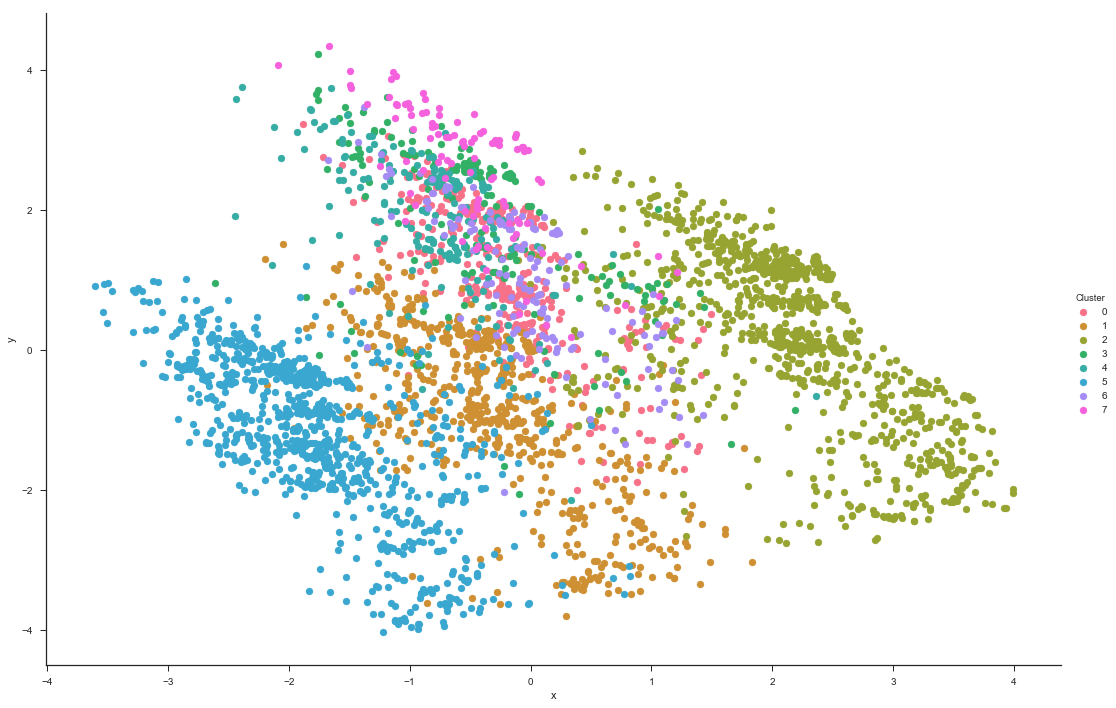

In [34]:

sns.set(style='ticks')

fg = sns.FacetGrid(data=new_data, hue='Cluster',size=10,aspect=1.5)
fg.map(plt.scatter, 'x', 'y').add_legend()

In [35]:
compare_dat['Cluster'] = new_data.iloc[:,-1].values

In [36]:
mean_ages = pd.pivot_table(compare_dat,index='Cluster',aggfunc='mean').Age

In [37]:
pd.pivot_table(compare_dat,index='Cluster',aggfunc='mean')

,Age,Amphet,Any Opioid,Benzodiazepine,Cocaine,EtOH,Fentanyl,Heroin,Hydrocodone,Location_Hospital,...,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black","Race_Hispanic, White","Race_Native American, Other",Race_Other,Race_Unknown,Race_White,Sex,Tramad
Cluster,,,,,,,,,,,,,,,,,,,,,
0,41.521246,0.022663,0.167139,0.198300,0.249292,0.201133,0.297450,0.572238,0.045326,0.362606,...,0.002833,0.000000,0.000000,0.073654,0.002833,0.000000,0.000000,0.875354,0.249292,0.014164
1,41.014658,0.032573,0.169381,0.280130,0.299674,0.258958,0.309446,0.519544,0.026059,0.397394,...,0.000000,0.000000,0.004886,0.123779,0.000000,0.004886,0.008143,0.745928,0.291531,0.013029
2,42.720545,0.019474,0.201558,0.205453,0.292113,0.207400,0.369036,0.564752,0.027264,0.303797,...,0.000000,0.000974,0.002921,0.170399,0.000000,0.001947,0.009737,0.722493,0.251217,0.020448
3,40.701085,0.016304,0.217391,0.271739,0.250000,0.184783,0.326087,0.500000,0.027174,0.244565,...,0.000000,0.000000,0.000000,0.032609,0.000000,0.000000,0.010870,0.907609,0.195652,0.027174
4,39.854271,0.010050,0.226131,0.180905,0.175879,0.185930,0.221106,0.603015,0.035176,0.281407,...,0.000000,0.000000,0.000000,0.020101,0.000000,0.000000,0.005025,0.964824,0.301508,0.040201
5,43.042664,0.022893,0.190427,0.292404,0.308012,0.200832,0.250780,0.491155,0.017690,0.339230,...,0.001041,0.000000,0.003122,0.084287,0.000000,0.001041,0.003122,0.798127,0.281998,0.021852
6,40.188811,0.034965,0.202797,0.223776,0.181818,0.209790,0.349650,0.559441,0.020979,0.307692,...,0.000000,0.000000,0.006993,0.097902,0.000000,0.000000,0.013986,0.825175,0.321678,0.034965
7,41.700000,0.010000,0.170000,0.210000,0.170000,0.250000,0.330000,0.460000,0.050000,0.200000,...,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.990000,0.320000,0.060000


## This section is all the time series analysis that is done on the total death number per month 

* This is starts by using a groupby function to join the year and month data and then using the size() to get the total elements in the each month set. 

* I then use a OLS Regression to find general linear regression and different stats to describe it

* Then I created an autocorelation plot to try and determine if the data is truly random or if there is a relationship (possibly period)

* Using a seasonal decompose function built into the statsmodel with a frequency of 12 to see if there is a monthly preiodicity that shows a relationship between number of deaths and the month of year





/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           1.69e-29
Time:                        13:28:03   Log-Likelihood:                -293.39
No. Observations:                  66   AIC:                             590.8
Df Residuals:                      64   BIC:                             595.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0262      0.003      9.896      0.0

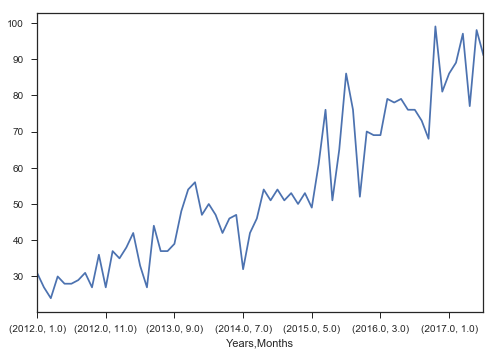

In [38]:
#Creating a table extract deaths per month data
table = compare_dat.groupby(['Years','Months']).size().plot(kind='line')

x = list(compare_dat.groupby(['Years','Months']).size().index)
y = (compare_dat.groupby(['Years','Months']).size().values)

#Running a simple Logisitc Regression
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


In [39]:
#Creating a DF to hold the deaths per year values
deaths_per_year = pd.DataFrame(y,x,columns=['Value'])
deaths_per_year.index.names=['Date']
deaths_per_year.reset_index(inplace=True)

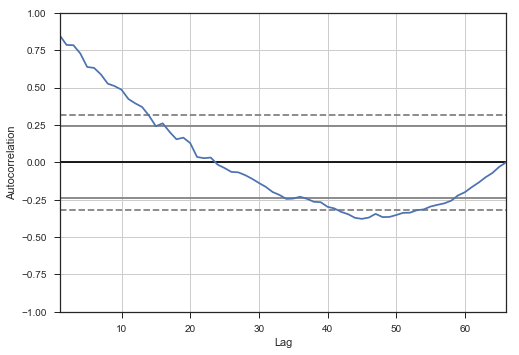

In [40]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(deaths_per_year['Value'])

In [41]:
from statsmodels.tsa.stattools import pacf
partialacf = pacf(deaths_per_year.Value[2:])


/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [42]:
deaths_per_year.Date=deaths_per_year.Date.apply(lambda x:'-'.join((str(x[0])[:-2],str(x[1])[:-2])) + ('-01'))
deaths_per_year.Date = pd.to_datetime(deaths_per_year['Date'],format='%Y-%m-%d')

In [43]:
deaths_per_year.set_index(deaths_per_year.Date,inplace=True)

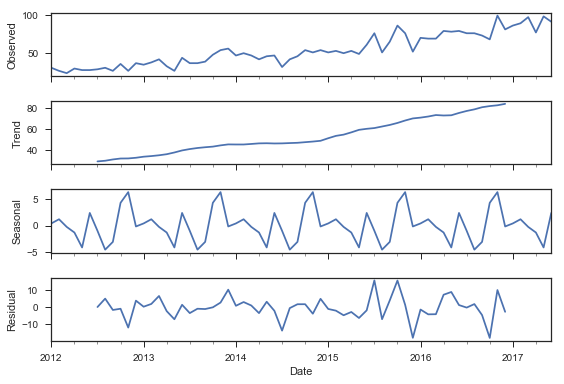

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostiton = seasonal_decompose(deaths_per_year.Value,freq=12,model = 'additive')
fig = plt.figure()
fig = decompostiton.plot()

In [45]:
#This code was got from http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/ and slightly modified by me 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print (dfoutput )

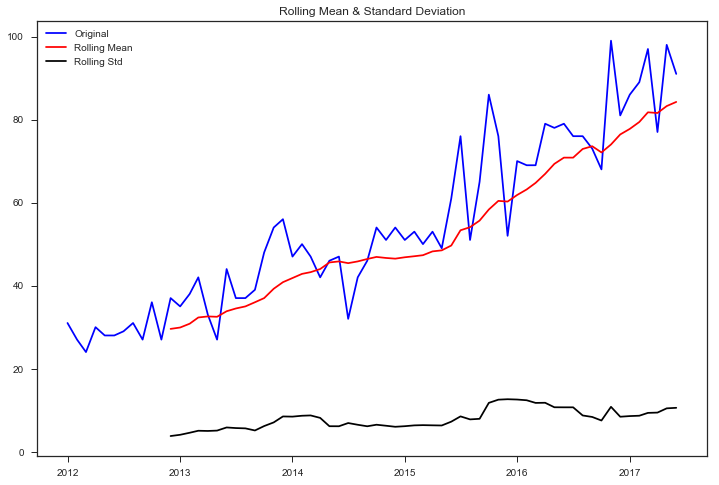

Results of Dickey-Fuller Test:
Test Statistic                  0.210942
p-value                         0.972869
#Lags Used                      5.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [46]:
test_stationarity(deaths_per_year.Value)

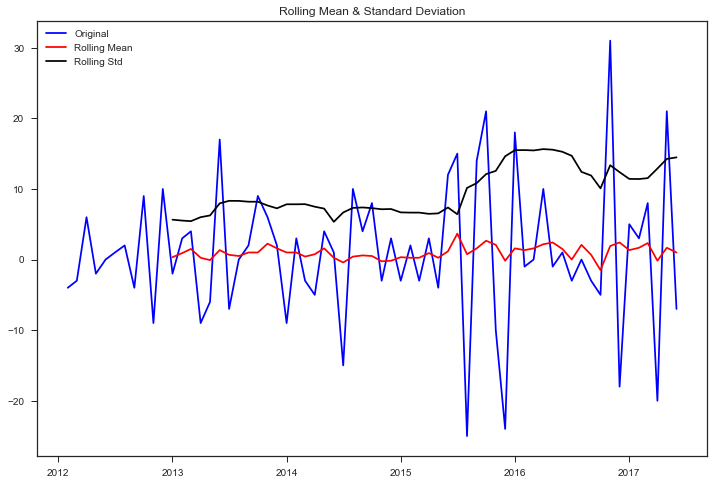

Results of Dickey-Fuller Test:
Test Statistic                 -5.331122
p-value                         0.000005
#Lags Used                      4.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [47]:
deaths_per_year['first_difference'] = deaths_per_year.Value - deaths_per_year.Value.shift(1)
test_stationarity(deaths_per_year.first_difference.dropna(inplace=False))

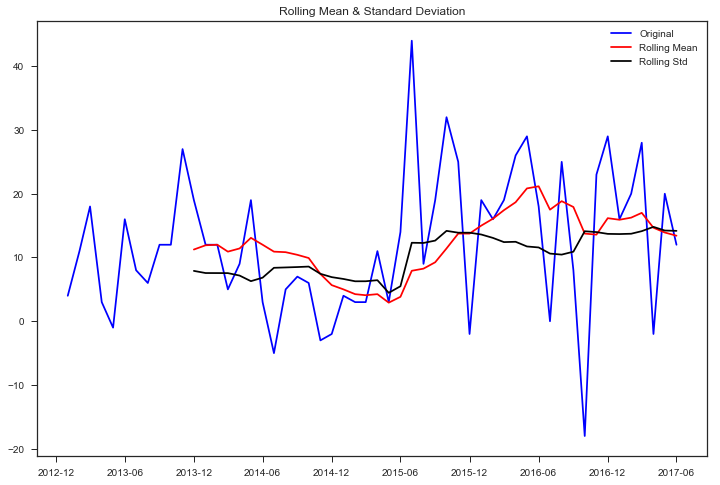

Results of Dickey-Fuller Test:
Test Statistic                 -2.748103
p-value                         0.066078
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [48]:
deaths_per_year['seasonal_difference'] = deaths_per_year.Value - deaths_per_year.Value.shift(12)
test_stationarity(deaths_per_year.seasonal_difference.dropna(inplace=False))

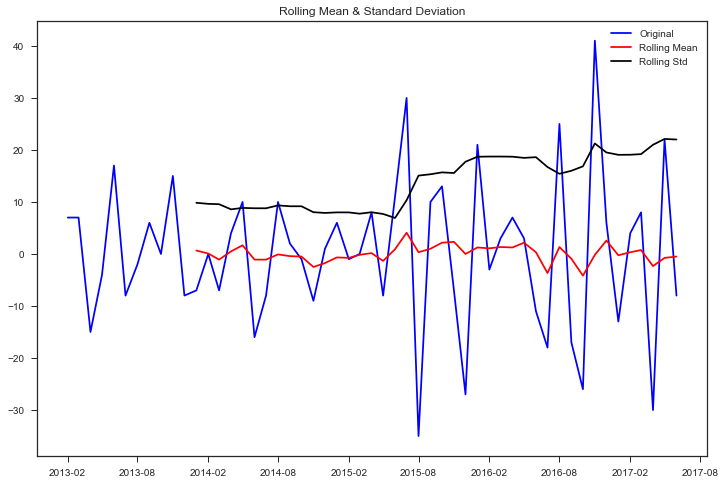

Results of Dickey-Fuller Test:
Test Statistic                 -1.778716
p-value                         0.391079
#Lags Used                     11.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [49]:
deaths_per_year['seasonal_first_difference'] = deaths_per_year.first_difference - deaths_per_year.first_difference.shift(12)
test_stationarity(deaths_per_year.seasonal_first_difference.dropna(inplace=False))    

In [52]:
"""residual = decompostiton.resid
residual.dropna(inplace=False)
test_stationarity(residual)"""

'residual = decompostiton.resid\nresidual.dropna(inplace=False)\ntest_stationarity(residual)'

We can see that there are minimal to no seasonal effects because the most stationary timeseries resulted in the first difference and did not result from either the seasonal or the seasonal coupled with the first difference 

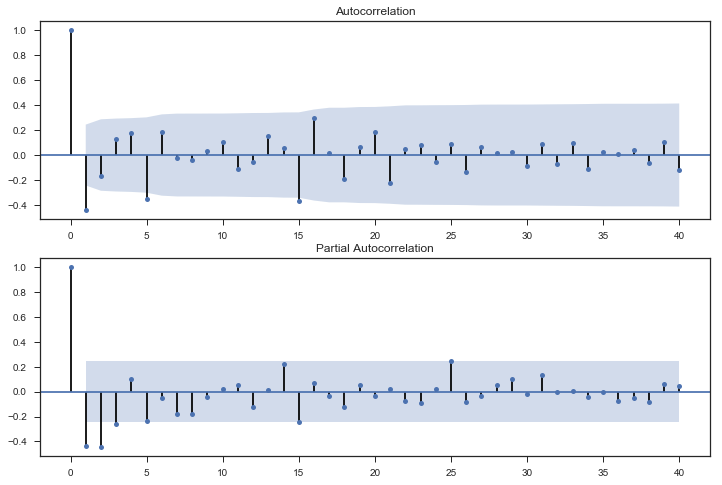

In [53]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(deaths_per_year.first_difference.iloc[1:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(deaths_per_year.first_difference.iloc[1:],lags=40,ax=ax2)

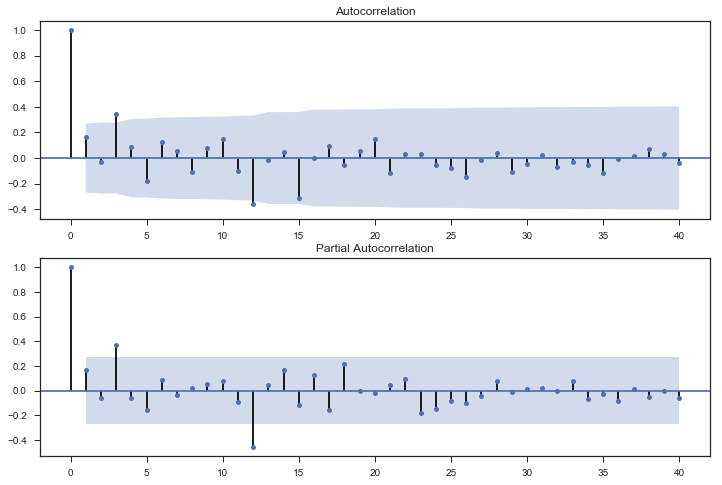

In [54]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(deaths_per_year.seasonal_difference.iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(deaths_per_year.seasonal_difference.iloc[13:],lags=40,ax=ax2)

In [55]:
from statsmodels.tsa.arima_model import ARIMA
deaths_per_year.Value = deaths_per_year.Value.astype(float)
arima = ARIMA(deaths_per_year.Value,(1,1,2))
results = arima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   65
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -225.444
Method:                       css-mle   S.D. of innovations              7.610
Date:                Tue, 05 Dec 2017   AIC                            460.889
Time:                        13:30:08   BIC                            471.761
Sample:                    02-01-2012   HQIC                           465.179
                         - 06-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0108      0.101      9.984      0.000       0.812       1.209
ar.L1.D.Value     0.9318      0.129      7.204      0.000       0.678       1.185
ma.L1.D.Value    -1.7975      0.163    -11.023      0.000      -2.117      -1.478
ma.L2.D.Value     0.7975      0.160      4.973      0.000       0.483       1.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0732           +0.0000j            1.0732            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.2539           +0.0000j            1.2539            0.0000
-----------------------------------------------------------------------------
"""

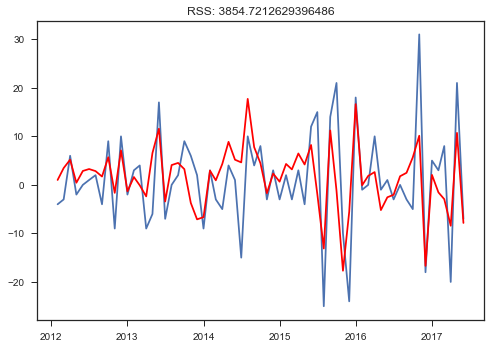

In [56]:
results_AR = arima.fit(disp=-1)  
plt.plot(deaths_per_year.first_difference)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: {}'.format(sum(((results_AR.fittedvalues-deaths_per_year.first_difference).dropna(inplace=False)**2))))

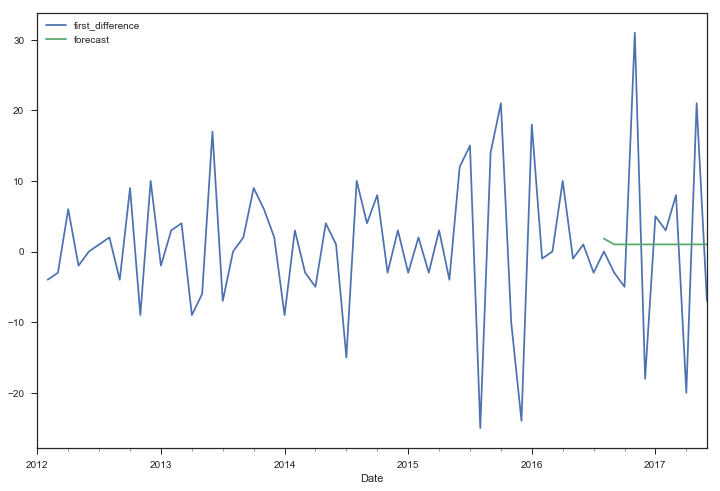

In [57]:
deaths_per_year['forecast'] = results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['first_difference', 'forecast']].plot(figsize=(12, 8))

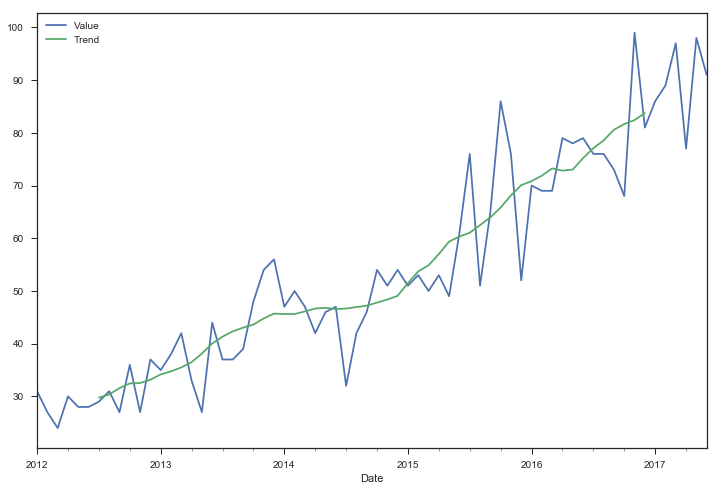

In [58]:
deaths_per_year['Trend'] = decompostiton.trend
deaths_per_year[['Value','Trend']].plot(figsize=(12,8))

In [59]:
mod = sm.tsa.statespace.SARIMAX(deaths_per_year.Value, trend='n', order=(1,1,2), seasonal_order=(1,1,1,12))
seasonal_results = mod.fit()
seasonal_results.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Value   No. Observations:                   66
Model:             SARIMAX(1, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -193.722
Date:                            Tue, 05 Dec 2017   AIC                            399.445
Time:                                    13:30:30   BIC                            412.583
Sample:                                01-01-2012   HQIC                           404.636
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.034    -29.300      0.000      -1.067      -0.933
ma.L1          0.1508      0.413      0.365      0.715      -0.660       0.961
ma.L2         -0.7252      0.448     -1.620      0.105      -1.603       0.152
ar.S.L12      -0.1569      0.452     -0.347      0.729      -1.044       0.730
ma.S.L12      -0.9641      7.651     -0.126      0.900     -15.960      14.031
sigma2        57.5534    403.375      0.143      0.887    -733.048     848.154
===================================================================================
Ljung-Box (Q):                       46.07   Jarque-Bera (JB):                 5.35
Prob(Q):                              0.24   Prob(JB):                         0.07
Heteroskedasticity (H):               1.85   Skew:                            -0.02
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

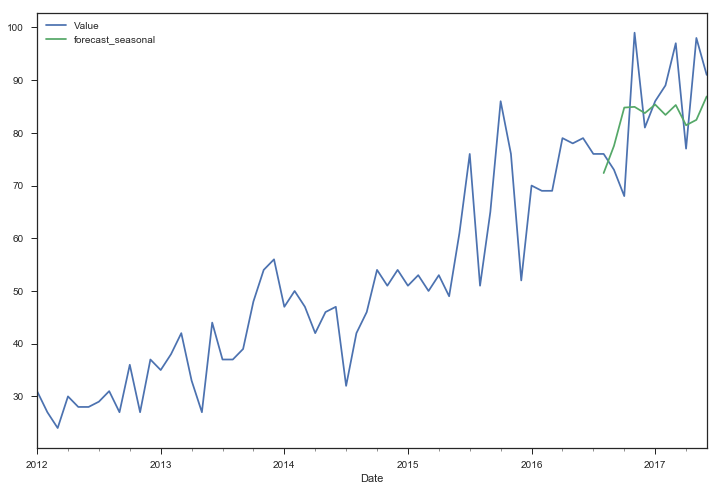

In [60]:
deaths_per_year['forecast_seasonal'] = seasonal_results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['Value', 'forecast_seasonal']].plot(figsize=(12, 8))

In [61]:
import datetime
import dateutil

In [62]:
start = datetime.datetime.strptime("2017-06-01", "%Y-%m-%d")
date_list = [start + dateutil.relativedelta.relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= deaths_per_year.columns)
deaths_per_year = pd.concat([deaths_per_year, future])

In [63]:
deaths_per_year

,Date,Value,first_difference,seasonal_difference,seasonal_first_difference,forecast,Trend,forecast_seasonal
2012-01-01,2012-01-01,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,2012-02-01,27.0,-4.0,NaN,NaN,NaN,NaN,NaN
2012-03-01,2012-03-01,24.0,-3.0,NaN,NaN,NaN,NaN,NaN
2012-04-01,2012-04-01,30.0,6.0,NaN,NaN,NaN,NaN,NaN
2012-05-01,2012-05-01,28.0,-2.0,NaN,NaN,NaN,NaN,NaN
2012-06-01,2012-06-01,28.0,0.0,NaN,NaN,NaN,NaN,NaN
2012-07-01,2012-07-01,29.0,1.0,NaN,NaN,NaN,29.750000,NaN
2012-08-01,2012-08-01,31.0,2.0,NaN,NaN,NaN,30.375000,NaN
2012-09-01,2012-09-01,27.0,-4.0,NaN,NaN,NaN,31.583333,NaN
2012-10-01,2012-10-01,36.0,9.0,NaN,NaN,NaN,32.458333,NaN


In [ ]:
deaths_per_year['forecast_seasonal'] = seasonal_results.predict(start = 55, end= 66, dynamic= True)  
deaths_per_year[['Value', 'forecast_seasonal']].plot(figsize=(12, 8))

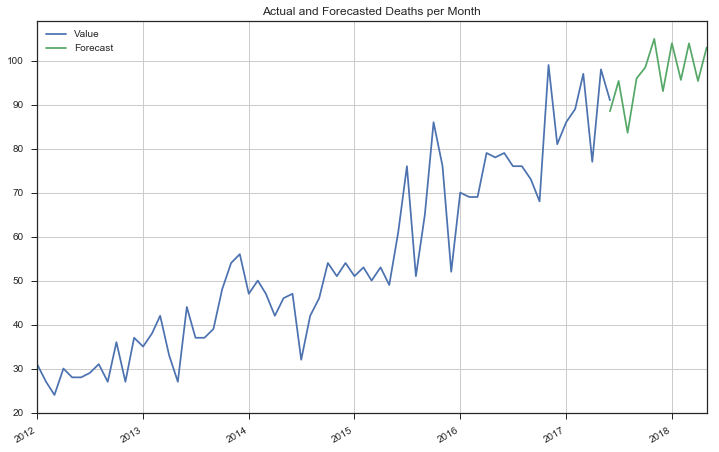

In [118]:
fig = plt.figure(figsize=(12, 8))
deaths_per_year['Forecast'] = seasonal_results.predict(start = 65, end= 77, dynamic= True)  
deaths_per_year[['Value', 'Forecast']].plot(figsize=(12, 8),grid=1)
plt.title('Actual and Forecasted Deaths per Month')
plt.savefig('death_forecast.png')
plt.show()
    